This is a simple example of how to build and train a simple Neural netwrok using Pytorch
source: https://towardsdatascience.com/build-a-simple-neural-network-using-pytorch-38c55158028d

### 1. Import PyTorch library

In [1]:
import torch
import torch.nn as nn

### 2. Prepare Dataset

In [2]:
n_input, n_hidden, n_out, batch_size, learning_rate = 10, 15, 1, 100, 0.01

We will now randomly initialize the dummy input and the output target data (or tensor) as follows:

In [5]:
data_x = torch.randn(batch_size, n_input)
data_y = (torch.rand(size=(batch_size, 1)) < 0.5).float()

In [15]:
data_x

tensor([[ 0.3004,  0.5199,  0.2633,  1.1873,  0.9230, -1.3414, -0.2128, -0.0769,
          0.8661,  0.7165],
        [-1.5108,  0.0197,  0.0707, -1.1177,  0.1692, -1.3134,  0.2359, -0.4369,
          0.6340,  0.2196],
        [ 0.5936, -1.8959, -0.3948,  0.0217, -1.7056,  0.4411,  0.1378, -1.0658,
          0.6198, -0.2780],
        [-1.6130, -0.5370, -0.9061, -1.4752,  1.4994,  0.3451, -1.3804,  0.9059,
         -1.1106,  2.2627],
        [ 0.5782,  1.1876, -1.1510, -0.5131, -0.5331,  1.3649,  0.5649,  2.9205,
          2.3572, -0.5363],
        [ 2.1297,  1.1091, -2.5526,  1.6785,  1.3581,  0.9741,  0.7146, -1.3004,
         -1.0078,  0.2777],
        [-0.7768,  0.0579,  0.2804,  1.4646,  0.0777, -0.6998,  0.9406, -0.3469,
          0.7457, -1.0708],
        [-0.4346,  0.2634, -0.0090,  0.2926,  0.7208, -0.8291,  0.0932, -0.8623,
          1.3535,  0.4708],
        [-0.9721,  0.7326,  0.6175,  0.2352, -1.4649, -0.3153,  0.1184,  0.5275,
         -1.2547, -0.5775],
        [-0.4122,  

We initialized the input data with 100 data samples with 10 features each and respectively initialized the output data with 100 data points.

In [14]:
print(data_x.size())
print(data_y.size())

torch.Size([100, 10])
torch.Size([100, 1])


### 3. Define Neural Network

In [7]:
model = nn.Sequential(nn.Linear(n_input, n_hidden),
                      nn.ReLU(),
                      nn.Linear(n_hidden, n_out),
                      nn.Sigmoid())
print(model)

Sequential(
  (0): Linear(in_features=10, out_features=15, bias=True)
  (1): ReLU()
  (2): Linear(in_features=15, out_features=1, bias=True)
  (3): Sigmoid()
)


In [8]:
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### 4. Training Loop

Here, we will define the training loop with the following steps:

- Forward propagation — compute the predicted y and calculate the current loss
- Backward propagation — after each epoch we set the gradients to zero before starting to do backpropagation
- Gradient descent — Finally, we will update model parameters by calling optimizer.step() function

In [11]:
losses = []
for epoch in range(10000):
    pred_y = model(data_x)
    loss = loss_function(pred_y, data_y)
    losses.append(loss.item())

    model.zero_grad()
    loss.backward()

    optimizer.step()

### 5. Output

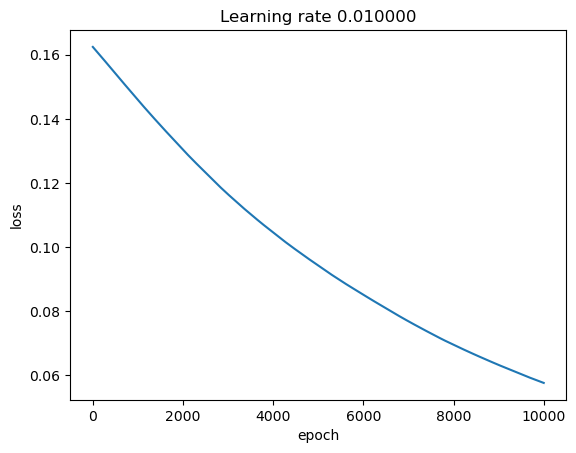

In [12]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Learning rate %f"%(learning_rate))
plt.show()